In [49]:
# Gonna try to model only the sidelobes, with just a single layer
import dLux as dl
import numpy as np
from matplotlib import pyplot as plt
import dLux.utils as dlu

# initialise coordinate system
wf_npix = 1024
diameter = 0.125 # 0.125 # still the same toliman mirror diameter (?)
coords = dlu.pixel_coords(wf_npix,diameter)

x = np.arange(wf_npix)
y = np.arange(wf_npix)
X, Y = np.meshgrid(x,y, indexing = 'ij') # I believe the indexing part is neccessary? Anyway doesn't break anything

# creating the aperture (circular)
aperture = dlu.circle(coords,0.5 * diameter)

# creating layer
aperture_layer = dl.layers.TransmissiveLayer(transmission=aperture, normalise=True)

# create the grating
grating_period = 16 # period of grating (pixels)
phase_difference = 0.348 # pi radians

# note that the magic of the pupil allows it to apply the same phase across all wavelengths!
grating = phase_difference/2 * np.pi * np.sin((X+Y)*2*np.pi/grating_period) #first part
grating += phase_difference/2 * np.pi * np.sin( (X - Y) * 2 * np.pi / grating_period) #second part

#inversion if neccesary
# blah blah
# no need to convert to optical path difference

# creating grating layer
grating_layer = dl.layers.AberratedLayer(phase=grating)

# constructing optical system
layers = [
    (
        'aperture',
        aperture_layer
    ),

    (
        'phase_grating',
        grating_layer
    )
]

# constructing the system
psf_npix = 256 # number of psf pixels (radius)
psf_pixel_scale = 1 # arcseconds per pixel
oversample = 4 # not any higher resolution

system = dl.AngularOpticalSystem(wf_npix, diameter, layers, psf_npix, psf_pixel_scale, oversample)

# constructing the source
wavelengths = np.linspace(530e-9,640e-9,12)
weights = np.linspace(0.1,1,12)
position = dlu.arcsec2rad(np.array([0,0]))
flux = 1e4 #(10,000 photons)
source = dl.PointSource(wavelengths, position, flux, weights)

# model the system
psf = system.model(source)


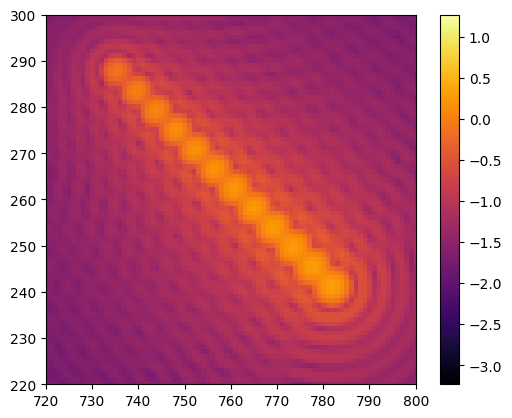

In [52]:
plt.imshow(np.log10(psf**0.5), origin='lower', cmap='inferno')
cx= 190*oversample
cy = 65*oversample
r= 10*oversample
plt.xlim(cx-r,cx+r)
plt.ylim(cy-r,cy+r)
plt.colorbar()
plt.show()


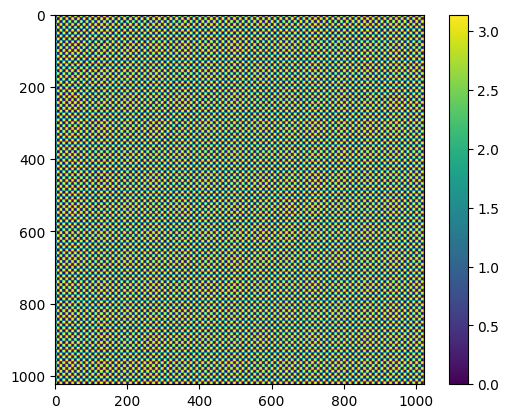

In [56]:
plt.imshow(np.angle(grating))
# plt.xlim(0,100)
# plt.ylim(0,100)
plt.colorbar()
plt.show()